
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt


In [ ]:

class StandardScalerManual:
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        return self

    def transform(self, X):
        return (X - self.mean) / (self.std + 1e-8)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [ ]:
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_predicted = np.dot(X, self.weights) + self.bias

            mse = np.mean((y - y_predicted)**2) + (self.l2_lambda * np.sum(self.weights**2))
            self.loss_history.append(mse)

            dw = (1/n_samples) * (np.dot(X.T, (y_predicted - y)) + 2 * self.l2_lambda * self.weights)
            db = (1/n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


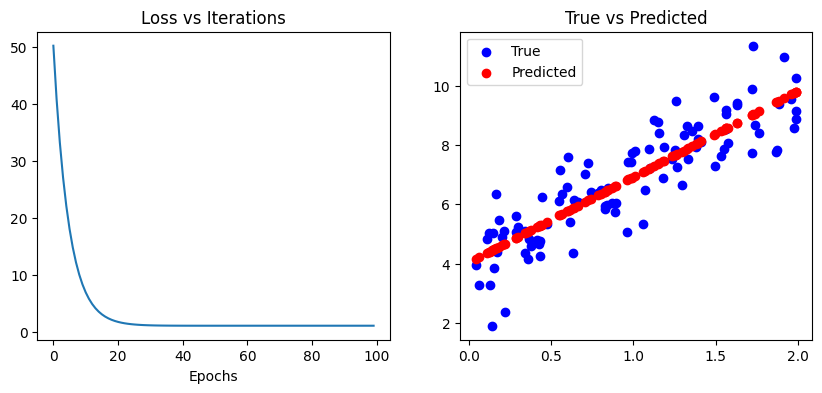

In [ ]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
y = y.flatten()

scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

model = LinearRegressionManual(lr=0.1, epochs=100, l2_lambda=0.1)
model.fit(X_scaled, y)
predictions = model.predict(X_scaled)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(model.loss_history)
plt.title("Loss vs Iterations")
plt.xlabel("Epochs")

plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', label='True')
plt.scatter(X, predictions, color='red', label='Predicted')
plt.title("True vs Predicted")
plt.legend()
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(3)

In [ ]:
class StandardScalerManual:
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        return self

    def transform(self, X):
        return (X - self.mean) / (self.std + 1e-8)

    def fit_transform(self, X):
        return self.fit(X).transform(X)


class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.losses = []
        self.W = None
        self.b = None

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            linear = np.dot(X, self.W) + self.b
            y_pred = self.sigmoid(linear)

            # Binary Cross Entropy Loss + L2 Regularization
            epsilon = 1e-15
            loss = (-1/n_samples) * np.sum(
                y * np.log(y_pred + epsilon) +
                (1 - y) * np.log(1 - y_pred + epsilon)
            ) + (self.l2_lambda / (2 * n_samples)) * np.sum(self.W ** 2)

            self.losses.append(loss)

            # Gradient Descent Calculation
            dW = (1/n_samples) * (np.dot(X.T, (y_pred - y)) + self.l2_lambda * self.W)
            db = (1/n_samples) * np.sum(y_pred - y)

            # Update Parameters
            self.W -= self.lr * dW
            self.b -= self.lr * db

    def predict(self, X):
        linear = np.dot(X, self.W) + self.b
        probs = self.sigmoid(linear)
        return (probs >= 0.5).astype(int)

In [ ]:
X_raw = np.random.rand(150, 2)
center = np.array([0.5, 0.5])
y_true = (np.linalg.norm(X_raw - center, axis=1) < 0.3).astype(int)

# Preprocessing
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X_raw)

# Training
model = LogisticRegressionScratch(lr=0.1, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y_true)

# Final Predictions
y_final_pred = model.predict(X_scaled)

------------------------------
REPORT: FINAL ACCURACY: 71.33%
------------------------------


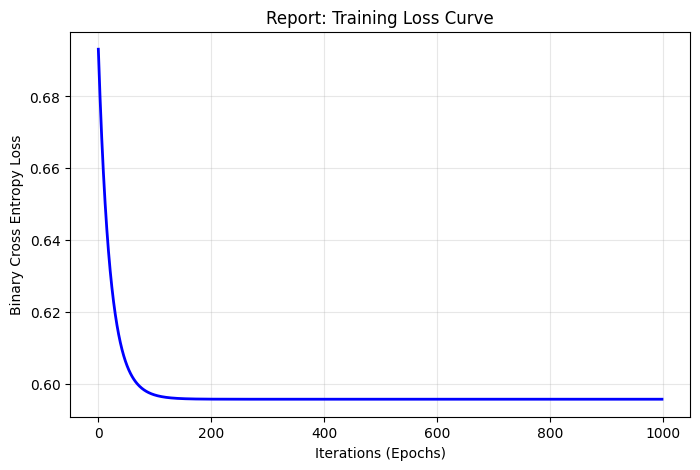

In [ ]:
final_accuracy = np.mean(y_final_pred == y_true)
print("-" * 30)
print(f"REPORT: FINAL ACCURACY: {final_accuracy * 100:.2f}%")
print("-" * 30)

# 2. Training Loss Curve Visualization
plt.figure(figsize=(8, 5))
plt.plot(model.losses, color='blue', linewidth=2)
plt.title("Report: Training Loss Curve")
plt.xlabel("Iterations (Epochs)")
plt.ylabel("Binary Cross Entropy Loss")
plt.grid(alpha=0.3)
plt.show()


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [ ]:
import numpy as np

def kmeans_matrix(M, k, max_iters=100):
    '''
    Implementation of K-Means clustering for individual matrix elements.
    '''
    n, m = M.shape

    data = M.flatten().reshape(-1, 1)

    indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[indices].astype(float)

    labels = np.zeros(data.shape[0])

    for _ in range(max_iters):
        distances = np.abs(data - centroids.T)
        new_labels = np.argmin(distances, axis=1)

        if np.array_equal(labels, new_labels):
            break
        labels = new_labels

        for i in range(k):
            points_in_cluster = data[labels == i]
            if len(points_in_cluster) > 0:
                centroids[i] = np.mean(points_in_cluster)

    assignment_table = labels.reshape(n, m).astype(int)

    cookbook = {i: [] for i in range(k)}
    for r in range(n):
        for c in range(m):
            cluster_id = assignment_table[r, c]
            cookbook[cluster_id].append((r, c))

    centroids_out = centroids.flatten()

    return assignment_table, cookbook, centroids_out

# --- TESTING THE OUTPUTS ---

M_test = np.random.randint(0, 100, (4, 4))
k_val = 3


assignment_table, cookbook, centroids = kmeans_matrix(M_test, k_val)


print("--- ORIGINAL MATRIX ---")
print(M_test)

print("\n--- ASSIGNMENT TABLE ---")
print(assignment_table)

print("\n--- CENTROIDS ---")
print(centroids)

print("\n--- COOKBOOK (First few entries) ---")
for cluster, positions in cookbook.items():
    print(f"Cluster {cluster}: {positions}")

--- ORIGINAL MATRIX ---
[[34 97 50 19]
 [11 32 48  6]
 [73  8 41 45]
 [32 48 77 88]]

--- ASSIGNMENT TABLE ---
[[2 1 2 0]
 [0 2 2 0]
 [1 0 2 2]
 [2 2 1 1]]

--- CENTROIDS ---
[11.   83.75 41.25]

--- COOKBOOK (First few entries) ---
Cluster 0: [(0, 3), (1, 0), (1, 3), (2, 1)]
Cluster 1: [(0, 1), (2, 0), (3, 2), (3, 3)]
Cluster 2: [(0, 0), (0, 2), (1, 1), (1, 2), (2, 2), (2, 3), (3, 0), (3, 1)]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
